In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set() 

%matplotlib inline 

import scipy.stats as stats

In [2]:
df = pd.read_csv('../data/movie_ratings.csv')

df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [3]:
genre_counts = df['genres'].value_counts()

genre_counts

genres
Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children        7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
unknown           10
Name: count, dtype: int64

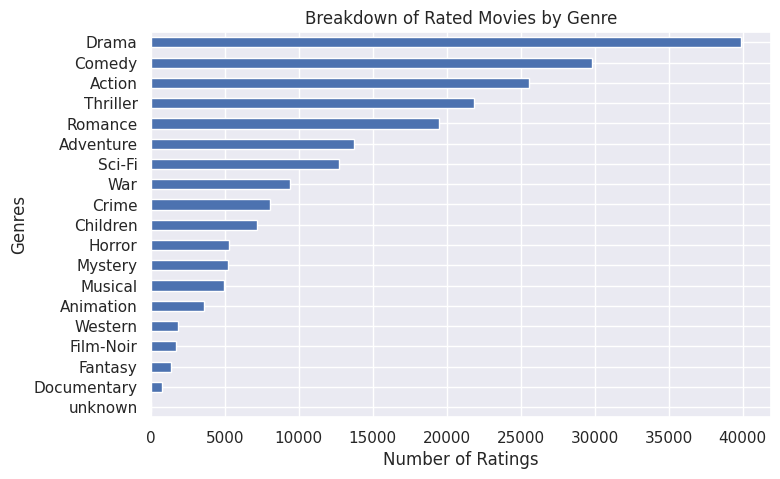

In [ ]:
# Q1: What's the breakdown of genres for the movies that were rated?
genre_counts.plot(kind='barh', figsize=(8, 5))

plt.xlabel("Number of Ratings")
plt.ylabel("Genres")
plt.title("Breakdown of Rated Movies by Genre")
plt.gca().invert_yaxis()
plt.show()

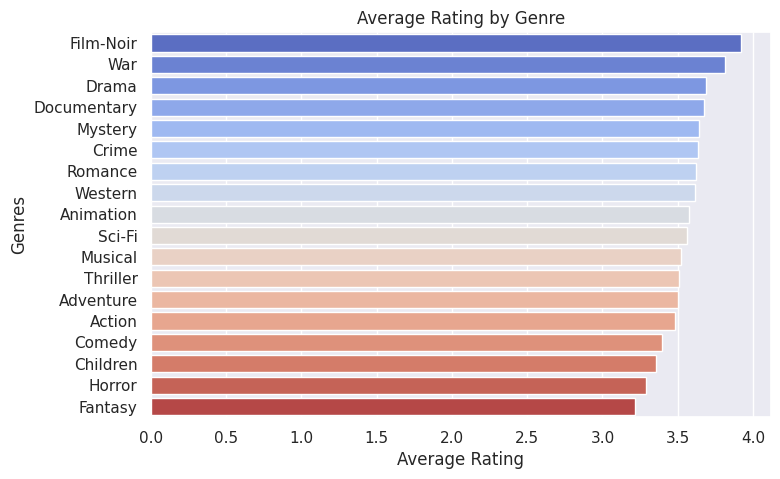

In [13]:
# Q2: Which genres have the highest viewer satisfaction (highest ratings)?
genre_stats = df.groupby('genres').agg(
    mean_rating=('rating', 'mean'),
    n_ratings=('rating', 'size')
).reset_index()

filtered = genre_stats[genre_stats['n_ratings'] >= 50].sort_values('mean_rating', ascending=False)
filtered

plt.figure(figsize=(8,5))
sns.barplot(data=filtered, x='mean_rating', y='genres', palette="coolwarm", hue='genres', dodge=False, legend=False)
plt.xlabel("Average Rating")
plt.ylabel("Genres")
plt.title("Average Rating by Genre")
plt.show()

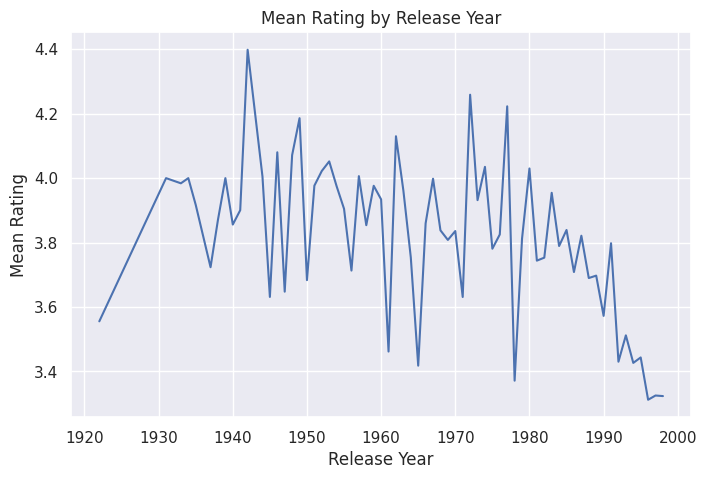

In [10]:
# Q3: How does mean rating change across movie release years?
year_stats = df.groupby('year').agg(
    mean_rating=('rating', 'mean'),
    n_ratings=('rating', 'size')
).reset_index()

year_filtered = year_stats[year_stats['n_ratings'] >= 50]

plt.figure(figsize=(8,5))
sns.lineplot(data=year_filtered, x='year', y='mean_rating')
plt.xlabel("Release Year")
plt.ylabel("Mean Rating")
plt.title("Mean Rating by Release Year")
plt.show()

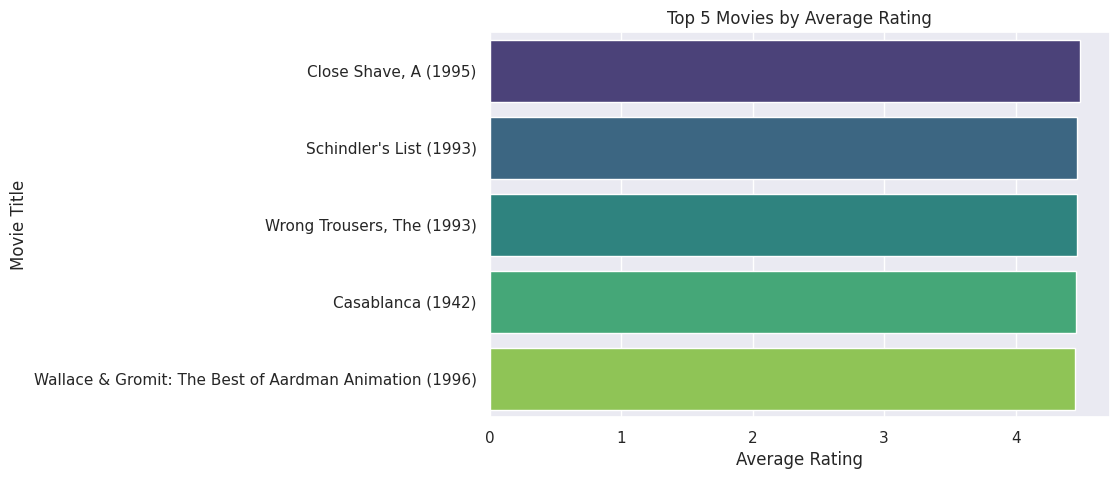

In [14]:
# Q4:
movie_stats = df.groupby(['movie_id','title']).agg(
    mean_rating=('rating', 'mean'),
    n_ratings=('rating', 'size')
).reset_index()

top_movies = movie_stats[movie_stats['n_ratings'] >= 50].sort_values(
    ['mean_rating', 'n_ratings'], ascending=[False, False]
).head(5)
top_movies

plt.figure(figsize=(8,5))
sns.barplot(data=top_movies, x='mean_rating', y='title', palette="viridis", hue='title', dodge=False, legend=False  )
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 5 Movies by Average Rating")
plt.show()